<a href="https://colab.research.google.com/github/PaulQuezada/MachineLearning/blob/main/Decision-Trees/MachineLearning_DesitionThree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Dataset Titanic

Son datos que incluyen diversas informaciones sobre los pasajeros como la clase del boleto, el sexo, la edad, el número de hermanos/cónyuges, el número de padres/hijos, la tarifa del boleto y el puerto de embarque.

# Cargar y mostrar parte del contenido

In [84]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #tipo de clasificador
from sklearn.tree import plot_tree #visualizar arbol de decision
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic = pd.get_dummies(titanic, drop_first=True)  # Esto realizará una codificación One-Hot
titanic = titanic.dropna()
titanic.sample(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
393,394,1,1,23.0,1,0,113.2750,0,0,0,...,0,0,0,0,0,0,0,0,0,0
386,387,0,3,1.0,5,2,46.9000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
117,118,0,2,29.0,1,0,21.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
782,783,0,1,29.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
764,765,0,3,16.0,0,0,7.7750,0,0,0,...,0,0,0,0,0,0,0,0,0,1
703,704,0,3,25.0,0,0,7.7417,0,0,0,...,0,0,0,0,0,0,0,0,1,0
308,309,0,2,30.0,1,0,24.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11,12,1,1,58.0,0,0,26.5500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23,24,1,1,28.0,0,0,35.5000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
690,691,1,1,31.0,1,0,57.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Dividir datos (train/test)

In [85]:
from sklearn.model_selection import train_test_split

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=500)

# Entrenar DT

In [86]:
tree_classifier = DecisionTreeClassifier(max_depth=4) # Creamos nuestro modelo
tree_classifier.fit(X_train, y_train) # Entrenamos nuestro modlelo

DecisionTreeClassifier(max_depth=4)

# ACC y F1- Sore (Test)

In [87]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8042
F1 Score: 0.7172


# Visualizar arbol

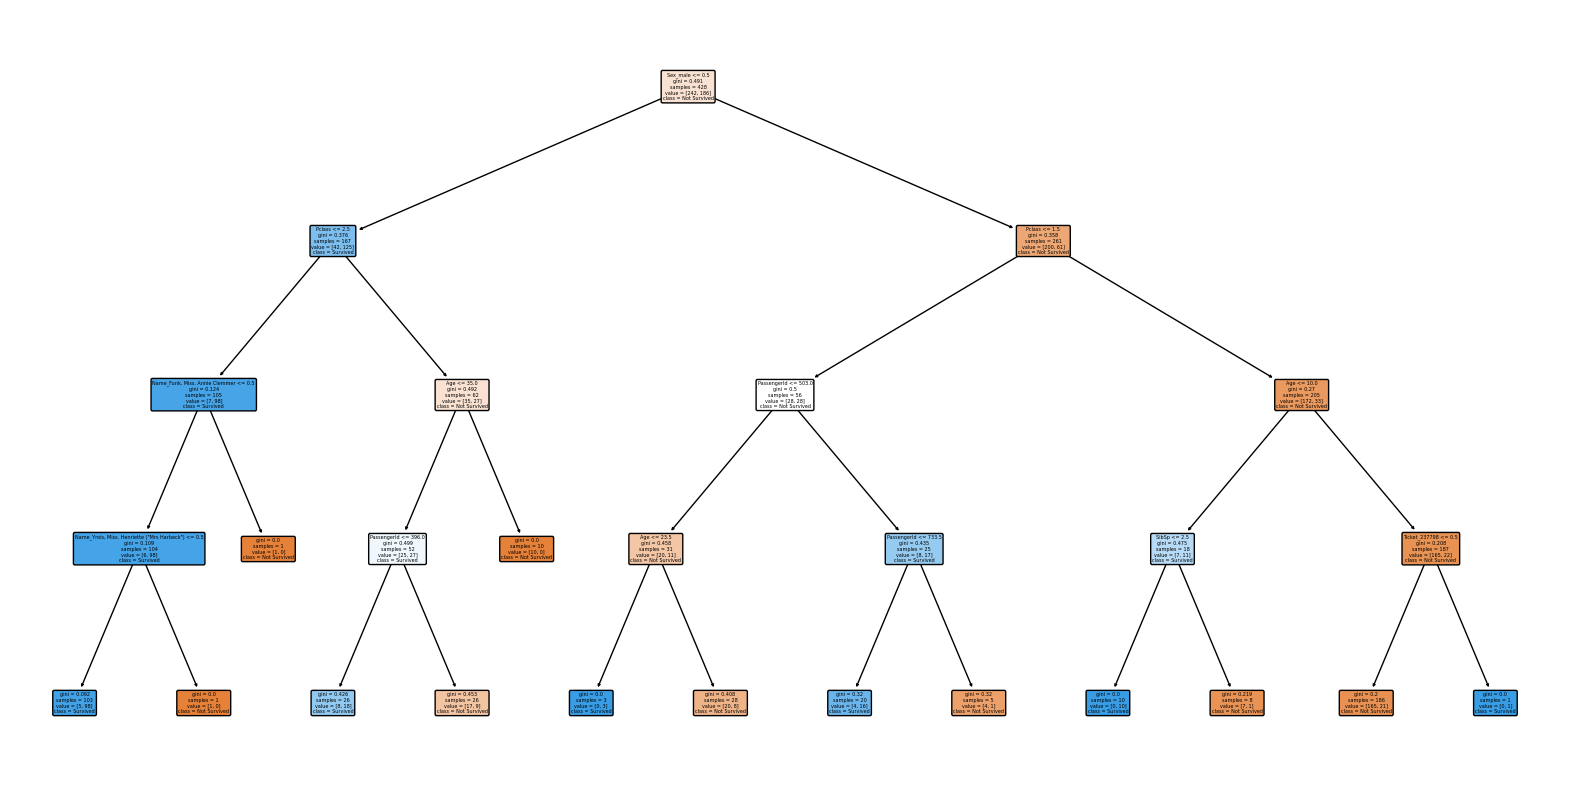

In [88]:
tree_classifier.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.show()

# Predict （test al azar）

In [90]:
y_pred = tree_classifier.predict(X)
titanic['pred'] = y_pred
titanic.sample(20)[['Survived','pred']]

,Survived,pred
120,0,0
0,0,0
661,0,0
795,0,0
41,0,1
721,0,0
217,0,0
562,0,0
309,1,1
757,0,0
